<a href="https://colab.research.google.com/github/DK0806/2311MC20/blob/main/A10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

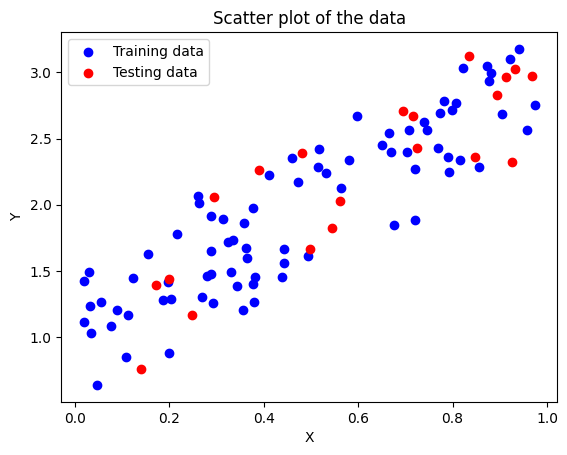

Estimated Coefficient (Slope): 1.9734941103347803
Estimated Intercept: 1.0192418104302992
Coefficient of determination (R-squared) of the prediction: 0.7643439835467629


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset from the provided CSV file
data = pd.read_csv('data.csv', header=None, names=['X', 'Y'])

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['X'], data['Y'], test_size=0.2, random_state=42)

# Plot the data
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of the data')
plt.legend()
plt.show()

# Reshape X_train and X_test to 2D arrays for fitting the linear model
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Fit a linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Report the estimated coefficients and intercept
print("Estimated Coefficient (Slope):", model.coef_[0])
print("Estimated Intercept:", model.intercept_)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Report the coefficient of determination (R-squared) of the prediction
r_squared = r2_score(y_test, y_pred)
print("Coefficient of determination (R-squared) of the prediction:", r_squared)

Explained Variance for all components:
Component 1: 0.7296244541329987
Component 2: 0.2285076178670178
Component 3: 0.036689218892828765
Component 4: 0.005178709107154797

Principal Components:
Principal Component 1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Principal Component 2: [0.37741762 0.92329566 0.02449161 0.06694199]
Principal Component 3: [-0.71956635  0.24438178  0.14212637  0.63427274]
Principal Component 4: [-0.26128628  0.12350962  0.80144925 -0.52359713]


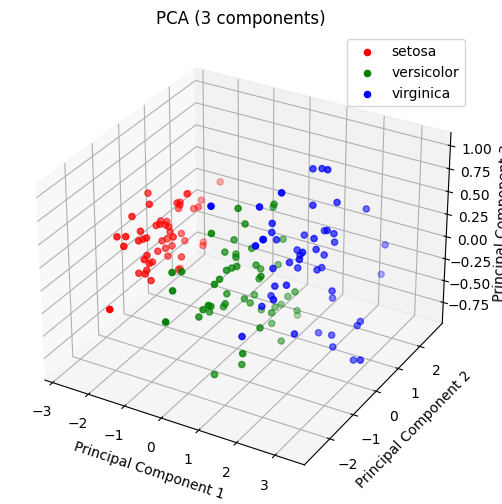

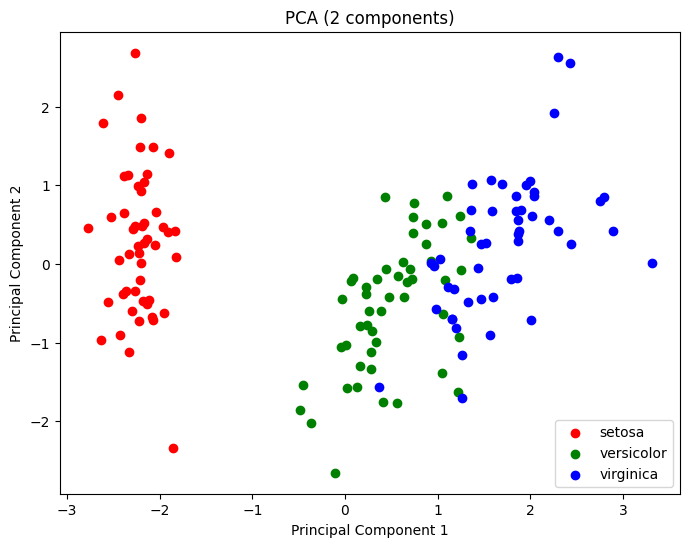


Explained Variance for the first two components:
Component 1: 0.7296244541329987
Component 2: 0.2285076178670178


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA to the standardized data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance for all components
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

# Identify the principal components
n_components = len(explained_variance)
print("Explained Variance for all components:")
for i in range(n_components):
    print(f"Component {i+1}: {explained_variance[i]}")

print("\nPrincipal Components:")
for i in range(n_components):
    print(f"Principal Component {i+1}:", principal_components[i])

# Reduce the dimensionality to 3 and plot the transformed data in a 3-D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], c=c, label=target_name)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA (3 components)')
plt.legend()
plt.show()

# Reduce the dimensionality to 2 and plot the transformed data in a 2-D plot
plt.figure(figsize=(8, 6))
for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 components)')
plt.legend()
plt.show()

# Report the explained variance for the first two components
explained_variance_2d = explained_variance[:2]
print("\nExplained Variance for the first two components:")
for i in range(2):
    print(f"Component {i+1}: {explained_variance_2d[i]}")

Estimated coefficients:
[[-5.98937381  8.39904481]
 [ 1.86898728 -4.02592145]
 [ 4.17811472 -4.38202597]]

Intercept:
[  3.88512185  -0.29390659 -13.69996396]


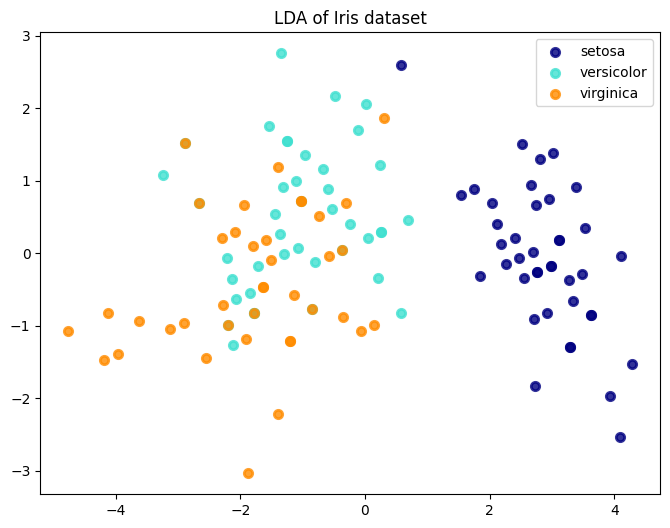

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into train(80%) and test(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose any 2 out of 4 features
# Let's choose the first two features for demonstration
X_train_selected = X_train[:, :2]

# Fit LDA model
lda = LDA()
lda.fit(X_train_selected, y_train)

# Report estimated coefficients, intercept, and covariance matrix
print("Estimated coefficients:")
print(lda.coef_)
print("\nIntercept:")
print(lda.intercept_)


# Transform the data according to LDA coefficients
X_train_transformed = lda.transform(X_train_selected)

# Plot the transformed data in a 2-D graph
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_train_transformed[y_train == i, 0], X_train_transformed[y_train == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Iris dataset')
plt.show()